In [24]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'Enter Your Crypto API Key',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2022-09-23T15:16:59.591Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9447}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9748, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
type(data)

dict

In [25]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.json_normalize(data['data'])

df['timestamp'] = pd.Timestamp('now') #GMT+3 For Me

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9748,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.915850e+07,1.915850e+07,NaN,1,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,18690.447224,3.697756e+10,-31.6811,0.092014,-1.183645,-4.961169,-13.025765,-14.448737,-11.473509,3.580809e+11,39.0140,3.924994e+11,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
1,1027,Ethereum,ETH,ethereum,6103,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.224922e+08,1.224922e+08,NaN,2,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,1284.809475,1.881477e+10,-23.0881,0.362895,1.436718,-11.169538,-22.231748,-15.518928,7.655431,1.573791e+11,17.1469,1.573791e+11,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
2,825,Tether,USDT,tether,40036,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.795470e+10,7.015545e+10,NaN,3,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.999971,5.453611e+10,-22.7203,-0.000375,-0.010133,0.000547,-0.008118,-0.008345,0.047233,6.795276e+10,7.4037,7.015345e+10,NaN,2022-09-23T15:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-23 18:17:01.548074
3,3408,USD Coin,USDC,usd-coin,6294,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.976134e+10,4.976134e+10,NaN,4,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.999980,5.113202e+09,-23.5646,0.001168,-0.008946,-0.004062,-0.005491,0.027822,-0.024244,4.976033e+10,5.4215,4.976033e+10,NaN,2022-09-23T15:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-23 18:17:01.548074
4,1839,BNB,BNB,bnb,1110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,270.372280,8.818450e+08,-21.6284,-0.095247,0.937023,-1.559470,-8.798327,5.766740,15.591895,4.362112e+10,4.7526,5.407446e+10,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
5,52,XRP,XRP,xrp,820,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.984875e+10,9.998929e+10,NaN,6,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.483097,7.555719e+09,78.0965,0.185627,9.861398,45.840567,40.496069,39.836106,33.939712,2.408176e+10,2.6238,4.830966e+10,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
6,4687,Binance USD,BUSD,binance-usd,5163,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.051725e+10,2.051725e+10,NaN,7,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.999843,9.505003e+09,-10.9604,-0.024826,-0.070004,-0.066687,-0.019537,-0.109915,0.002981,2.051403e+10,2.2351,2.051403e+10,NaN,2022-09-23T15:14:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-23 18:17:01.548074
7,2010,Cardano,ADA,cardano,571,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.422704e+10,3.495058e+10,NaN,8,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.450998,1.025815e+09,-6.5417,0.086903,0.714229,-1.837934,-2.135991,-8.023954,-7.096349,1.543631e+10,1.6808,2.029489e+10,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
8,5426,Solana,SOL,solana,386,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.545215e+08,5.116169e+08,NaN,9,NaN,NaN,NaN,2022-0

In [51]:
def api_runner():
    global df3
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'Enter Your Crypto API Key',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.Timestamp('now') #GMT+3 For Me
    df3 = pd.concat([df,df2])
    
    if not os.path.isfile(r'D:\Data\CryptoAPI\API.csv'):
       df3.to_csv(r'D:\Data\CryptoAPI\API.csv', header = 'column_names') 
    else:
       df3.to_csv(r'D:\Data\CryptoAPI\API.csv', mode = 'a', header = False) 

In [54]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Working')
    sleep(60)
exit()

{'status': {'timestamp': '2022-09-23T16:23:35.884Z', 'error_code': 0, 'error_message': None, 'elapsed': 50, 'credit_count': 1, 'notice': None, 'total_count': 9447}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9748, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

{'status': {'timestamp': '2022-09-23T16:24:36.945Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 9447}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9748, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

API Working


KeyboardInterrupt: 

In [55]:
df3

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9748,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.915850e+07,1.915850e+07,NaN,1,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,18690.447224,3.697756e+10,-31.6811,0.092014,-1.183645,-4.961169,-13.025765,-14.448737,-11.473509,3.580809e+11,39.0140,3.924994e+11,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
1,1027,Ethereum,ETH,ethereum,6103,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.224922e+08,1.224922e+08,NaN,2,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,1284.809475,1.881477e+10,-23.0881,0.362895,1.436718,-11.169538,-22.231748,-15.518928,7.655431,1.573791e+11,17.1469,1.573791e+11,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
2,825,Tether,USDT,tether,40036,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.795470e+10,7.015545e+10,NaN,3,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.999971,5.453611e+10,-22.7203,-0.000375,-0.010133,0.000547,-0.008118,-0.008345,0.047233,6.795276e+10,7.4037,7.015345e+10,NaN,2022-09-23T15:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-23 18:17:01.548074
3,3408,USD Coin,USDC,usd-coin,6294,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.976134e+10,4.976134e+10,NaN,4,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.999980,5.113202e+09,-23.5646,0.001168,-0.008946,-0.004062,-0.005491,0.027822,-0.024244,4.976033e+10,5.4215,4.976033e+10,NaN,2022-09-23T15:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-23 18:17:01.548074
4,1839,BNB,BNB,bnb,1110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,270.372280,8.818450e+08,-21.6284,-0.095247,0.937023,-1.559470,-8.798327,5.766740,15.591895,4.362112e+10,4.7526,5.407446e+10,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
5,52,XRP,XRP,xrp,820,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.984875e+10,9.998929e+10,NaN,6,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.483097,7.555719e+09,78.0965,0.185627,9.861398,45.840567,40.496069,39.836106,33.939712,2.408176e+10,2.6238,4.830966e+10,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
6,4687,Binance USD,BUSD,binance-usd,5163,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.051725e+10,2.051725e+10,NaN,7,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.999843,9.505003e+09,-10.9604,-0.024826,-0.070004,-0.066687,-0.019537,-0.109915,0.002981,2.051403e+10,2.2351,2.051403e+10,NaN,2022-09-23T15:14:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-23 18:17:01.548074
7,2010,Cardano,ADA,cardano,571,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.422704e+10,3.495058e+10,NaN,8,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.450998,1.025815e+09,-6.5417,0.086903,0.714229,-1.837934,-2.135991,-8.023954,-7.096349,1.543631e+10,1.6808,2.029489e+10,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
8,5426,Solana,SOL,solana,386,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.545215e+08,5.116169e+08,NaN,9,NaN,NaN,NaN,2022-0

In [56]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [57]:
df3

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9748,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19158500.00000,19158500.00000,NaN,1,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,18690.44722,36977556124.69532,-31.68110,0.09201,-1.18364,-4.96117,-13.02577,-14.44874,-11.47351,358080933140.47571,39.01400,392499391703.41998,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
1,1027,Ethereum,ETH,ethereum,6103,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122492189.49900,122492189.49900,NaN,2,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,1284.80947,18814771193.53058,-23.08810,0.36289,1.43672,-11.16954,-22.23175,-15.51893,7.65543,157379125627.75635,17.14690,157379125627.76001,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
2,825,Tether,USDT,tether,40036,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,67954703168.01751,70155449908.74805,NaN,3,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.99997,54536112804.54321,-22.72030,-0.00037,-0.01013,0.00055,-0.00812,-0.00834,0.04723,67952763405.85585,7.40370,70153447326.42999,NaN,2022-09-23T15:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-23 18:17:01.548074
3,3408,USD Coin,USDC,usd-coin,6294,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,49761335172.82066,49761335172.82066,NaN,4,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.99998,5113201594.95121,-23.56460,0.00117,-0.00895,-0.00406,-0.00549,0.02782,-0.02424,49760328204.36232,5.42150,49760328204.36000,NaN,2022-09-23T15:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-23 18:17:01.548074
4,1839,BNB,BNB,bnb,1110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,270.37228,881845025.45130,-21.62840,-0.09525,0.93702,-1.55947,-8.79833,5.76674,15.59189,43621123201.72779,4.75260,54074456089.09000,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
5,52,XRP,XRP,xrp,820,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49848747475.00000,99989294935.00000,NaN,6,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.48310,7555718857.91232,78.09650,0.18563,9.86140,45.84057,40.49607,39.83611,33.93971,24081760519.63676,2.62380,48309660201.02000,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:17:01.548074
6,4687,Binance USD,BUSD,binance-usd,5163,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,20517253084.58926,20517253084.58926,NaN,7,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.99984,9505003038.74831,-10.96040,-0.02483,-0.07000,-0.06669,-0.01954,-0.10991,0.00298,20514030506.47705,2.23510,20514030506.48000,NaN,2022-09-23T15:14:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-09-23 18:17:01.548074
7,2010,Cardano,ADA,cardano,571,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34227040771.90900,34950580348.96300,NaN,8,NaN,NaN,NaN,2022-09-23T15:14:00.000Z,0.45100,1025814771.59036,-6.54170,0.08690,0.71423,-1.83793,-2.13599,-8.02395,-7.09635,15436312111.83564,1.68080,20294890512.50000,NaN,2022-09-23T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-23 18:1

In [76]:
df4 = df3.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.01830,-1.11954,-4.72470,-13.52026,-14.52204,-11.28725
Ethereum,0.09795,1.84218,-10.68101,-22.64282,-15.30658,8.12233
Tether,0.00093,-0.00808,0.00124,-0.00658,-0.00785,0.04677
USD Coin,0.00102,-0.01025,0.00623,0.00546,0.01446,-0.01302
BNB,-0.03345,1.00848,-1.19966,-9.05709,5.80040,16.08641
XRP,-0.42053,11.08153,45.89836,40.36105,39.89207,34.97977
Binance USD,-0.03461,-0.02511,-0.04321,-0.01434,0.00372,-0.03450
Cardano,-0.07893,0.67294,-1.73707,-2.47932,-8.07695,-6.74571
Solana,-0.10028,-0.73488,-2.09031,-11.83505,-18.34312,-21.40190


In [77]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.01830
              quote.USD.percent_change_24h    -1.11954
              quote.USD.percent_change_7d     -4.72470
              quote.USD.percent_change_30d   -13.52026
              quote.USD.percent_change_60d   -14.52204
                                                ...   
UNUS SED LEO  quote.USD.percent_change_24h   -13.55857
              quote.USD.percent_change_7d    -16.49396
              quote.USD.percent_change_30d   -22.18503
              quote.USD.percent_change_60d   -19.24921
              quote.USD.percent_change_90d   -30.50627
Length: 120, dtype: float64

In [78]:
type(df5)

pandas.core.series.Series

In [79]:
df6 = df5.to_frame(name = 'values')
df6

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.01830
             quote.USD.percent_change_24h  -1.11954
             quote.USD.percent_change_7d   -4.72470
             quote.USD.percent_change_30d -13.52026
             quote.USD.percent_change_60d -14.52204
...                                             ...
UNUS SED LEO quote.USD.percent_change_24h -13.55857
             quote.USD.percent_change_7d  -16.49396
             quote.USD.percent_change_30d -22.18503
             quote.USD.percent_change_60d -19.24921
             quote.USD.percent_change_90d -30.50627

[120 rows x 1 columns]

In [80]:
type(df6)

pandas.core.frame.DataFrame

In [81]:
df6 = df6.reset_index()

In [82]:
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01830
1,Bitcoin,quote.USD.percent_change_24h,-1.11954
2,Bitcoin,quote.USD.percent_change_7d,-4.72470
3,Bitcoin,quote.USD.percent_change_30d,-13.52026
4,Bitcoin,quote.USD.percent_change_60d,-14.52204
...,...,...,...
115,UNUS SED LEO,quote.USD.percent_change_24h,-13.55857
116,UNUS SED LEO,quote.USD.percent_change_7d,-16.49396
117,UNUS SED LEO,quote.USD.percent_change_30d,-22.18503
118,UNUS SED LEO,quote.USD.percent_change_60d,-19.24921


In [83]:
df6 = df6.rename(columns = {'level_1' : 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01830
1,Bitcoin,quote.USD.percent_change_24h,-1.11954
2,Bitcoin,quote.USD.percent_change_7d,-4.72470
3,Bitcoin,quote.USD.percent_change_30d,-13.52026
4,Bitcoin,quote.USD.percent_change_60d,-14.52204
...,...,...,...
115,UNUS SED LEO,quote.USD.percent_change_24h,-13.55857
116,UNUS SED LEO,quote.USD.percent_change_7d,-16.49396
117,UNUS SED LEO,quote.USD.percent_change_30d,-22.18503
118,UNUS SED LEO,quote.USD.percent_change_60d,-19.24921


In [84]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,-0.01830
1,Bitcoin,24h,-1.11954
2,Bitcoin,7d,-4.72470
3,Bitcoin,30d,-13.52026
4,Bitcoin,60d,-14.52204
...,...,...,...
115,UNUS SED LEO,24h,-13.55857
116,UNUS SED LEO,7d,-16.49396
117,UNUS SED LEO,30d,-22.18503
118,UNUS SED LEO,60d,-19.24921


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

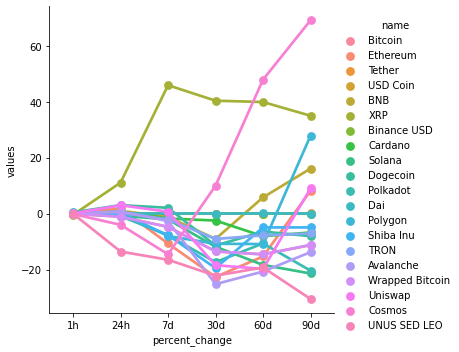

In [85]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df6, kind = 'point')

In [88]:
df7 = df3[['name', 'quote.USD.price', 'timestamp']]
df7 = df7.query('name == "Bitcoin"')
df7

,name,quote.USD.price,timestamp
0,Bitcoin,18690.44722,2022-09-23 18:17:01.548074
0,Bitcoin,18704.61206,2022-09-23 19:24:37.347262
